In [1]:
from anthropic import Anthropic
import os
from dotenv import load_dotenv
import ast
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

#Funtions file with unique functions
import functions

In [2]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the API key from environment variables
api_key = os.getenv("ANTHROPIC_API_KEY_AKSHAY")

In [3]:
client = Anthropic(
    # This is the default and can be omitted
    api_key=api_key,
)

In [4]:
requested_design = "The Letter H"

In [5]:
current_coordinates = [[1,3]]

In [6]:
prompt = functions.create_prompt(current_coordinates=current_coordinates, requested_design=requested_design)
print(prompt)


A drone is being used to place building blocks on a grid.
Please read all of the following instructions first.

You will be asked to come up with the drop-off locations for the drone that create a specified design.
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4]. 

You can think of the grid like the pixels of a tv screen, with your job being to decide which pixel to turn on.
The grid currently looks as follows, where "o" is an empty spot (or off pixel) and "x" is a spot that has a existing block (or on pixel):

4 o o o o o
3 o x o o o
2 o o o o o
1 o o o o o
0 o o o o o
  0 1 2 3 4



Any existing points marked with "x" has already been chosen and must be incorporated in the design you will create. 
Make sure these pieces then align with one another to create the design in a logical layout.

Only Integer points are allowed.
You can make the design in any ori

In [7]:
# Define the prompt
prompt = prompt

response = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="claude-3-5-sonnet-20240620",
)
print(response.content)

[TextBlock(text='{\n    "Design": [\n        {\n            "Title": "The Letter H",\n            "New Coordinates": [\n                [1, 1],\n                [1, 2],\n                [1, 4],\n                [2, 3],\n                [3, 1],\n                [3, 2],\n                [3, 3],\n                [3, 4]\n            ],\n            "Existing Coordinates": [\n                [1, 3]\n            ],\n            "Reasoning": "To create the letter H, we need two vertical lines connected by a horizontal line in the middle. The existing block at [1, 3] can serve as part of the left vertical line. We\'ll complete the left vertical line by adding blocks at [1, 1], [1, 2], and [1, 4]. For the right vertical line, we\'ll place blocks at [3, 1], [3, 2], [3, 3], and [3, 4]. Finally, we\'ll connect these lines with a horizontal line in the middle by adding a block at [2, 3]. This creates a clear, legible \'H\' shape within the 5x5 grid, incorporating the existing block and staying with

In [8]:
# Extract the response text
response_text = response.content[0].text
print(response_text)

{
    "Design": [
        {
            "Title": "The Letter H",
            "New Coordinates": [
                [1, 1],
                [1, 2],
                [1, 4],
                [2, 3],
                [3, 1],
                [3, 2],
                [3, 3],
                [3, 4]
            ],
            "Existing Coordinates": [
                [1, 3]
            ],
            "Reasoning": "To create the letter H, we need two vertical lines connected by a horizontal line in the middle. The existing block at [1, 3] can serve as part of the left vertical line. We'll complete the left vertical line by adding blocks at [1, 1], [1, 2], and [1, 4]. For the right vertical line, we'll place blocks at [3, 1], [3, 2], [3, 3], and [3, 4]. Finally, we'll connect these lines with a horizontal line in the middle by adding a block at [2, 3]. This creates a clear, legible 'H' shape within the 5x5 grid, incorporating the existing block and staying within the grid limits."
        }
    ]
}


[[1, 1], [1, 2], [1, 4], [2, 3], [3, 1], [3, 2], [3, 3], [3, 4]]


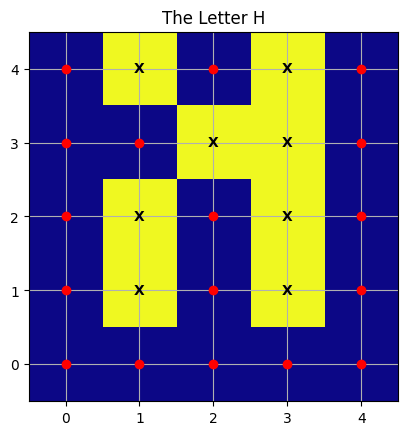

To create the letter H, we need two vertical lines connected by a horizontal line in the middle. The existing block at [1, 3] can serve as part of the left vertical line. We'll complete the left vertical line by adding blocks at [1, 1], [1, 2], and [1, 4]. For the right vertical line, we'll place blocks at [3, 1], [3, 2], [3, 3], and [3, 4]. Finally, we'll connect these lines with a horizontal line in the middle by adding a block at [2, 3]. This creates a clear, legible 'H' shape within the 5x5 grid, incorporating the existing block and staying within the grid limits.


In [9]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['New Coordinates']
    print(coordinates)
    functions.plot_coordinates(title, coordinates)
    print(design['Reasoning'])

In [28]:
grid_representation = functions.create_grid_representation(coordinates=coordinates)
print(grid_representation)

4 o o o o o
3 o x o o o
2 o o x o o
1 o x x x o
0 x x x x x
  0 1 2 3 4



In [ ]:
Test_JSON_prompt = f"""
You were previously provided the following prompt: 
START PROMPT 
{original_prompt} 
END PROMPT

Your reponse to this prompt was the following JSON: 
START RESPONSE 
{JSON_Output} 
END RESPONSE

While executing the coordinates that were previoulsy provided, blocks were correctly placed at {correct_xy}.
However, an when trying to place a block at {desired_xy}, it was instead placed at {actual_xy}.

This means there are currently blocks at {correct_xy} and {actual_xy}.

You are now tasked with checking the design and recovering it if possible.

If the design is recoverable by continuing with the current plan in a different order, then
provide the coorindates where blocks still need to be placed in the JSON structure provided.

If the design is not recoverable with the current plan, then try to recover it with a new layout that incorparates the already placed blocks. 
A new layout might mean a different orientation of the design, such as turning the design or laterally shifting it, which is allowed if needed. 
Note that any block that has already been placed cannot be removed and therefore must be used in any new designs.
Make sure your design makes if you do a redisgn, then provide the coorindates where blocks still need to be placed at in the JSON structure provided.

Make sure to follow the instructions from the original prompt if needed.

If the design it not not recoverable at all, reply set the Title as "Design is not recoverable." and provide no Coordinates.
"""